<a href="https://colab.research.google.com/github/boing-86/ML_study/blob/main/chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state = 42
)

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
#using K-NeighborsClassifier - multi-class classification
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target), kn.score(test_scaled, test_target))

print(kn.predict(test_scaled[:5]))
proba = kn.predict_proba(test_scaled[:5])
print(kn.classes_)
print(np.round(proba, decimals=5))

distances, indexes = kn.kneighbors(test_scaled[0:1])
print(train_target[indexes])
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

0.8907563025210085 0.85
['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.      0.      1.      0.      0.      0.      0.     ]
 [0.      0.      0.      0.      0.      1.      0.     ]
 [0.      0.      0.      1.      0.      0.      0.     ]
 [0.      0.      0.66667 0.      0.33333 0.      0.     ]
 [0.      0.      0.66667 0.      0.33333 0.      0.     ]]
[['Perch' 'Perch' 'Perch']]
[['Roach' 'Perch' 'Perch']]


In [ ]:
from sklearn.linear_model import LogisticRegression
from scipy.special import expit

bream_smelt_indexes = (train_target=='Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)
print(lr.predict_proba(train_bream_smelt[:5]))
print(lr.coef_, lr.intercept_)

decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)
print(expit(decisions))
result = []
for i in expit(decisions):
  if(i < 0.5):
    result.append("Bream")
  else:
    result.append("Smelt")

print(result)

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]
[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]
[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]
[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]
['Bream', 'Smelt', 'Bream', 'Bream', 'Bream']


In [ ]:
lr = LogisticRegression(C=20, max_iter = 1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target), lr.score(test_scaled, test_target))
print(lr.predict(test_scaled[:5]))

proba = lr.predict_proba(test_scaled[:5])
print(lr.classes_)
print(np.round(proba, decimals = 3))
print('\n', lr.coef_)
print(lr.intercept_)



0.9327731092436975 0.925
['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]

 [[-1.49002911 -1.02919221  2.59351113  7.70354318 -1.20068079]
 [ 0.19619256 -2.0106062  -3.77982687  6.50490143 -1.99486463]
 [ 3.56278472  6.34361428 -8.48973364 -5.75756295  3.79309039]
 [-0.10458533  3.60316654  3.93067417 -3.61731229 -1.75070607]
 [-1.40059104 -6.07505264  5.25967743 -0.87222909  1.86043657]
 [-1.38528628  1.49217379  1.3922839  -5.67732641 -4.40095877]
 [ 0.62151448 -2.32410356 -0.90658611  1.71598614  3.69368329]]
[-0.09204845 -0.26290731  3.25101057 -0.14742485  2.65496057 -6.78780765
  1.38421712]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier


fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state = 42
)

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target), sc.score(test_scaled, test_target))
#1 epoch 추가
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target), sc.score(test_scaled, test_target))

0.773109243697479 0.775
0.8151260504201681 0.825


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


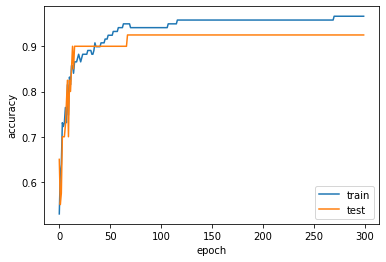

In [ ]:
import matplotlib.pyplot as plt

sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

for i in range(0, 300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

plt.plot(train_score, label='train')
plt.plot(test_score, label = 'test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target), sc.score(test_scaled, test_target))

0.957983193277311 0.925
